<a href="https://colab.research.google.com/github/amnaahmad20/forage-British-Airways/blob/task-1/task1_data_analysis_web_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Regarding the aircraft and seat...
1,Not Verified | I travelled with British Airway...
2,Not Verified | Food was lousy. Who ever is pl...
3,✅ Trip Verified | Had the worst experience. Th...
4,✅ Trip Verified | The ground staff were not h...


In [ ]:
df.to_csv("/content/data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [ ]:
df

,reviews
0,Regarding the aircraft and seat: The business...
1,I travelled with British Airways from Sweden ...
2,Food was lousy. Who ever is planning the Asi...
3,Had the worst experience. The flight from Lon...
4,The ground staff were not helpful. Felt like...
...,...
995,Mumbai to Edinburgh via London. I'm quite su...
996,Mumbai to London Heathrow. Disappointing exp...
997,Delhi to London. Having read many negative r...
998,When you travel British Airways its like you ...


In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...
1,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...
2,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...
3,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...
4,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...


In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu..."
1,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...,"[(travelled, v), (British, a), (Airways, n), (..."
2,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...,"[(Food, n), (lousy, n), (ever, r), (planning, ..."
3,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo..."
4,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...,"[(ground, n), (staff, n), (helpful, a), (Felt,..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",Regarding aircraft seat business class seat ...
1,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...,"[(travelled, v), (British, a), (Airways, n), (...",travel British Airways Sweden Los Angeles vi...
2,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...,"[(Food, n), (lousy, n), (ever, r), (planning, ...",Food lousy ever plan Asian Hindu Vegetarian ...
3,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo...",bad experience flight London Toronto get del...
4,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...,"[(ground, n), (staff, n), (helpful, a), (Felt,...",ground staff helpful Felt like want rush us ...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Regarding the aircraft and seat: The business...,Regarding aircraft seat business class seat ...
1,I travelled with British Airways from Sweden ...,travel British Airways Sweden Los Angeles vi...
2,Food was lousy. Who ever is planning the Asi...,Food lousy ever plan Asian Hindu Vegetarian ...
3,Had the worst experience. The flight from Lon...,bad experience flight London Toronto get del...
4,The ground staff were not helpful. Felt like...,ground staff helpful Felt like want rush us ...
...,...,...
995,Mumbai to Edinburgh via London. I'm quite su...,Mumbai Edinburgh via London quite surprised ...
996,Mumbai to London Heathrow. Disappointing exp...,Mumbai London Heathrow Disappointing experie...
997,Delhi to London. Having read many negative r...,Delhi London read many negative review Briti...
998,When you travel British Airways its like you ...,travel British Airways like lucky able Briti...


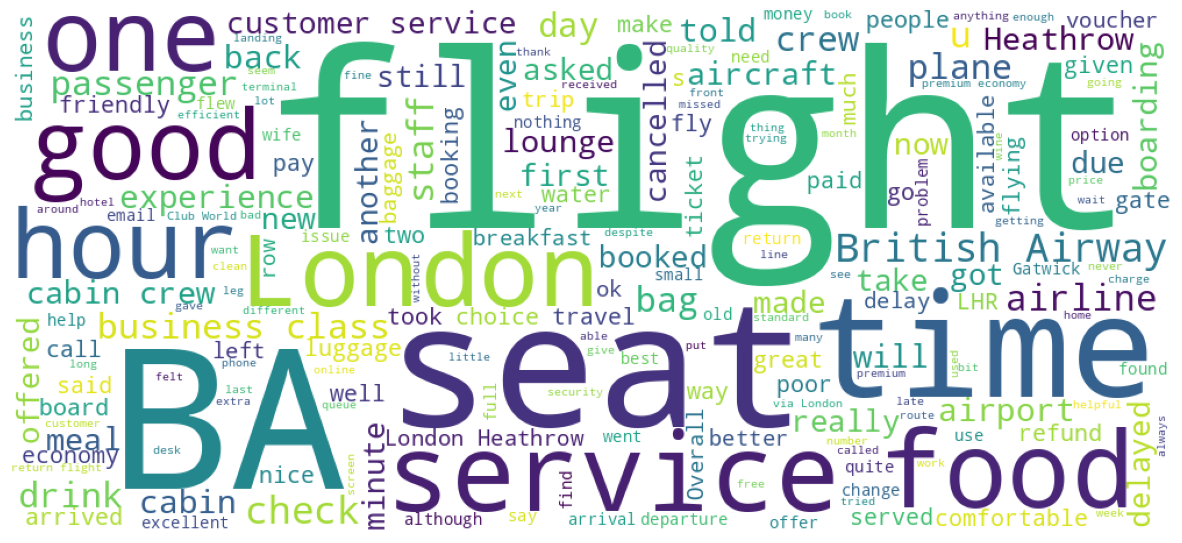

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",Regarding aircraft seat business class seat ...,0.8676,Positive
1,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...,"[(travelled, v), (British, a), (Airways, n), (...",travel British Airways Sweden Los Angeles vi...,-0.7902,Negative
2,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...,"[(Food, n), (lousy, n), (ever, r), (planning, ...",Food lousy ever plan Asian Hindu Vegetarian ...,-0.5574,Negative
3,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo...",bad experience flight London Toronto get del...,0.1546,Neutral
4,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...,"[(ground, n), (staff, n), (helpful, a), (Felt,...",ground staff helpful Felt like want rush us ...,0.6124,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    524
Negative    370
Neutral     106
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f171e109a20>,
 [Text(-0.09039212540541025, 1.1965906834271662, 'Positive'),
  Text(-0.2802478556160989, -1.0637016214251902, 'Negative'),
  Text(1.0395693672787505, -0.35957687719826836, 'Neutral')],
 [Text(-0.05272873981982264, 0.6980112319991802, '52.4%'),
  Text(-0.15286246669969028, -0.58020088441374, '37.0%'),
  Text(0.5670378366975002, -0.19613284210814638, '10.6%')])

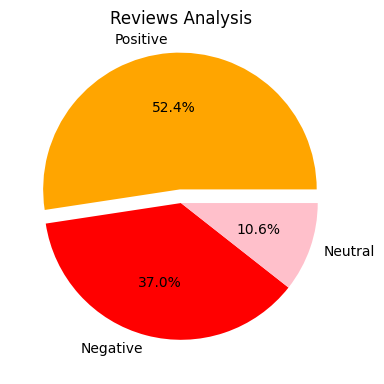

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False,colors=['orange','red','pink'])

In [ ]:
df.to_csv("BA_reviews.csv")

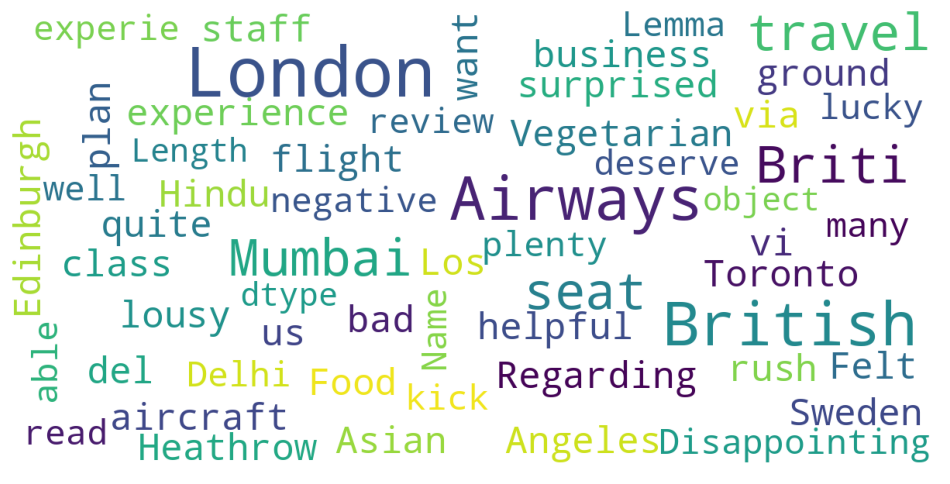

In [ ]:
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)